In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from scipy.stats import norm, cauchy
from scipy.ndimage import gaussian_filter1d

In [2]:
%matplotlib notebook

In [3]:
output_dir = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/outputs/NOVEL/eHH/mas/'

In [10]:
(1/50e3)/1e-9

20000.0

In [81]:
project_root = '/home/chen/coding/projects/dnpsoup'
file_loc = 'dnpsoup_analytics/outputs/NOVEL/eHH/mas/qband_eigen_a0b0g0_mas50kHz_param4_mix300_loop3.result'
filepath = os.path.join(project_root, file_loc)
df_eigen = pd.read_csv(filepath, header=None, comment='#')
df_eigen.head()

0             1             2             3             4  \
0  0.000000e+00 -1.681126e+10 -1.676036e+10 -1.675985e+10 -1.670893e+10   
1  1.000000e-09 -1.681126e+10 -1.676036e+10 -1.675985e+10 -1.670893e+10   
2  2.000000e-09 -1.681126e+10 -1.676036e+10 -1.675985e+10 -1.670893e+10   
3  3.000000e-09 -1.681126e+10 -1.676036e+10 -1.675985e+10 -1.670893e+10   
4  4.000000e-09 -1.681126e+10 -1.676036e+10 -1.675985e+10 -1.670893e+10   

              5             6             7             8  
0  1.670944e+10  1.675985e+10  1.676034e+10  1.681076e+10  
1  1.670944e+10  1.675985e+10  1.676034e+10  1.681076e+10  
2  1.670944e+10  1.675985e+10  1.676034e+10  1.681076e+10  
3  1.670944e+10  1.675985e+10  1.676034e+10  1.681076e+10  
4  1.670944e+10  1.675985e+10  1.676034e+10  1.681076e+10

<IPython.core.display.Javascript object>


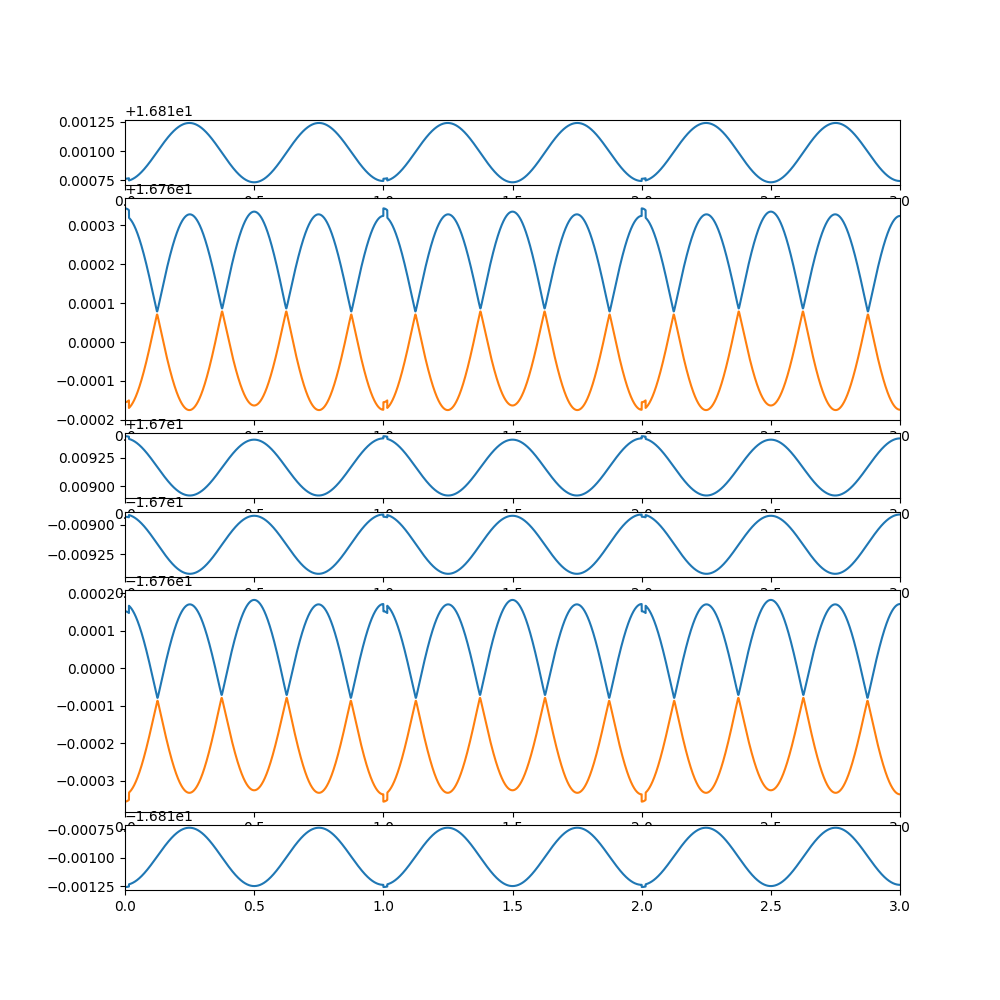

In [105]:
rotor_period = 2e-5
e_res = 33.52e9/2
h_res = 51e6
fig = plt.figure(figsize=(10, 10), dpi=100)
ax1 = plt.subplot2grid((10, 1), (0, 0), rowspan=1)
ax2 = plt.subplot2grid((10, 1), (1, 0), rowspan=3, sharex=ax1)
ax3 = plt.subplot2grid((10, 1), (4, 0), rowspan=1, sharex=ax1)
ax4 = plt.subplot2grid((10, 1), (5, 0), rowspan=1, sharex=ax1)
ax5 = plt.subplot2grid((10, 1), (6, 0), rowspan=3, sharex=ax1)
ax6 = plt.subplot2grid((10, 1), (9, 0), rowspan=1, sharex=ax1)
x = np.arange(df_eigen.shape[0])
ax1.plot(df_eigen[0]/rotor_period, df_eigen[8]/1e9)
ax1.set_xlim(0, 3)

ax2.plot(df_eigen[0]/rotor_period, df_eigen[7]/1e9)
ax2.plot(df_eigen[0]/rotor_period, df_eigen[6]/1e9)
# ax2.plot(df_eigen[0]/rotor_period, df_eigen[8]-e_res-h_res)
# ax2.plot(df_eigen[0]/rotor_period, df_eigen[7]-e_res)
# ax2.plot(df_eigen[0]/rotor_period, df_eigen[6]-e_res)
# ax2.plot(df_eigen[0]/rotor_period, df_eigen[5]-e_res+h_res)


ax3.plot(df_eigen[0]/rotor_period, df_eigen[5]/1e9)
ax4.plot(df_eigen[0]/rotor_period, df_eigen[4]/1e9)
ax5.plot(df_eigen[0]/rotor_period, df_eigen[3]/1e9)
ax5.plot(df_eigen[0]/rotor_period, df_eigen[2]/1e9)
ax6.plot(df_eigen[0]/rotor_period, df_eigen[1]/1e9)

plt.savefig('NOVEL_qband_eigen_vals.ps')
plt.show()    

### Evaluate Steps

In [118]:
output_dir = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/outputs/NOVEL/eHH/mas/10kHz/'

filename = 'qband_acqH_buildup_raw_2p4A_a0b0g0_static_param4_mix300_loop3.result'
filepath = os.path.join(output_dir, filename)
df_static_h_dist2p4A = pd.read_csv(filepath, skiprows=2, header=None)
filename = 'qband_acqH_buildup_raw_2p0A_a0b0g0_static_param4_mix300_loop3.result'
filepath = os.path.join(output_dir, filename)
df_static_h_dist2p0A = pd.read_csv(filepath, skiprows=2, header=None)
filename = 'qband_acqH_buildup_raw_3p0A_a0b0g0_static_param4_mix300_loop3.result'
filepath = os.path.join(output_dir, filename)
df_static_h_dist3p0A = pd.read_csv(filepath, skiprows=2, header=None)

<IPython.core.display.Javascript object>


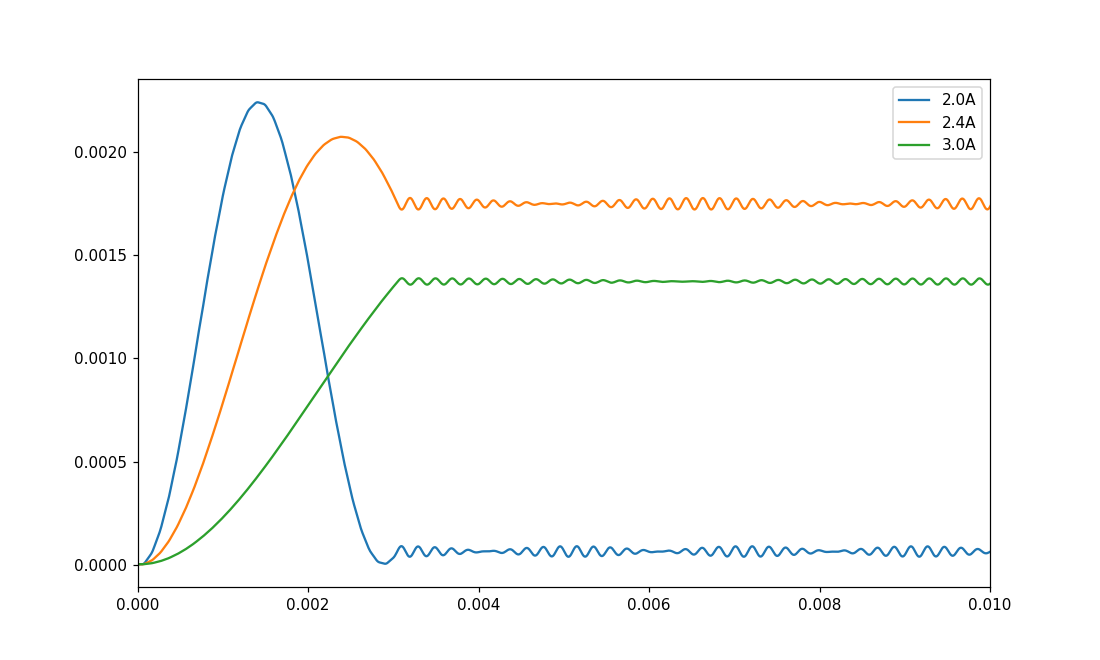

In [122]:
inc = 1e-9
rotor_period = 1e5 * inc
fig = plt.figure(figsize=(10, 6))
plt.plot(df_static_h_dist2p0A[0]/rotor_period, df_static_h_dist2p0A[1], label='2.0A')
plt.plot(df_static_h_dist2p4A[0]/rotor_period, df_static_h_dist2p4A[1], label='2.4A')
plt.plot(df_static_h_dist3p0A[0]/rotor_period, df_static_h_dist3p0A[1], label='3.0A')
plt.xlim(0, 0.01)
plt.legend(loc='best')
plt.show()

In [125]:
output_dir = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/outputs/NOVEL/eHH/mas/10kHz/'

filename = 'qband_acqH_buildup_raw_2p0A_a0b0g0_static_param4_mix300_loop3.result'
filepath = os.path.join(output_dir, filename)
df_static_h_dist2p0A = pd.read_csv(filepath, skiprows=2, header=None)
filename = 'qband_acqH_buildup_raw_2p0A_a0b0g0_static_param4_mix750_loop3.result'
filepath = os.path.join(output_dir, filename)
df_static_h_dist2p0A_mix750 = pd.read_csv(filepath, skiprows=2, header=None)

<IPython.core.display.Javascript object>


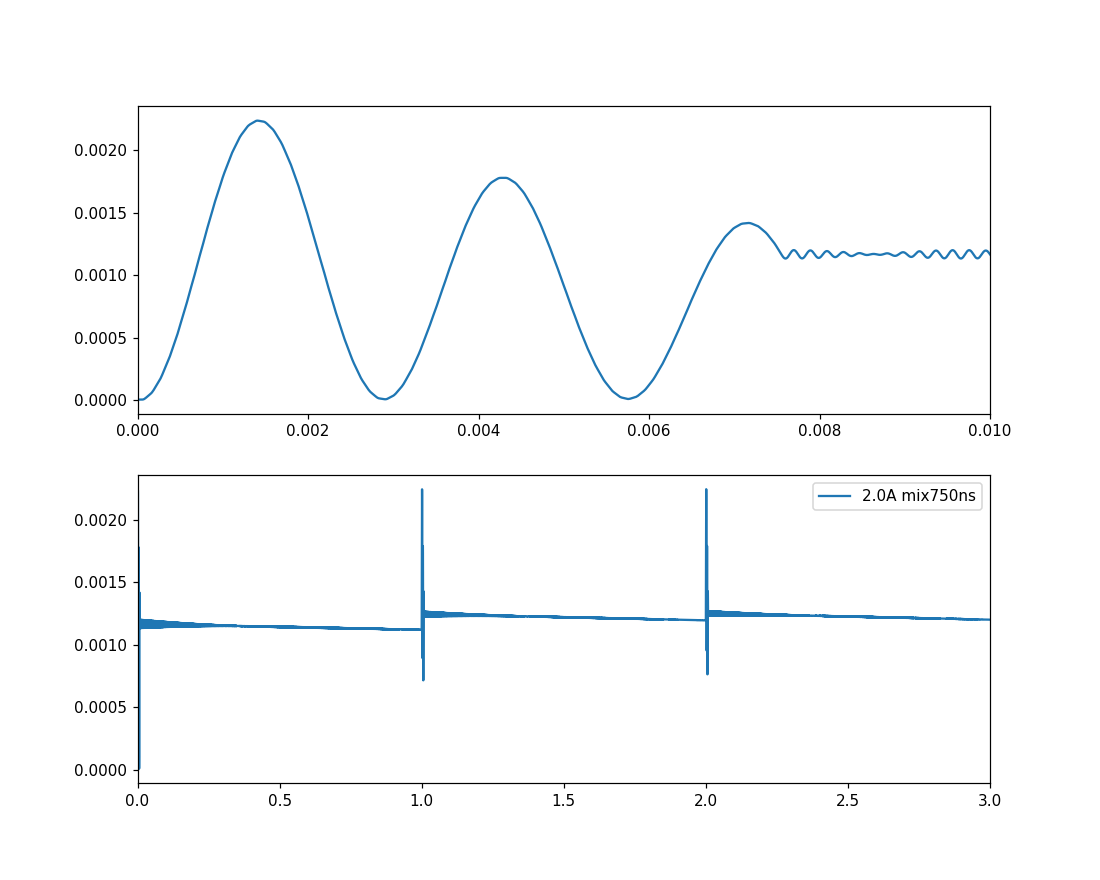

In [129]:
inc = 1e-9
rotor_period = 1e5 * inc
fig = plt.figure(figsize=(10, 8))
ax1 = plt.subplot2grid((2, 1), (0, 0))
ax2 = plt.subplot2grid((2, 1), (1, 0))
# ax1.plot(df_static_h_dist2p0A[0]/rotor_period, df_static_h_dist2p0A[1], label='2.0Amix300ns')
ax1.plot(df_static_h_dist2p0A_mix750[0]/rotor_period, df_static_h_dist2p0A_mix750[1], label='2.0A mix750ns')
ax1.set_xlim(0, 0.01)

# ax2.plot(df_static_h_dist2p0A[0]/rotor_period, df_static_h_dist2p0A[1], label='2.0Amix300ns')
ax2.plot(df_static_h_dist2p0A_mix750[0]/rotor_period, df_static_h_dist2p0A_mix750[1], label='2.0A mix750ns')
ax2.set_xlim(0, 3)
plt.legend(loc='best')
plt.show()

### Polarization Buildups

In [83]:
output_dir = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/outputs/NOVEL/eHH/mas/'
filename = 'qband_buildup_raw_a0b0g0_mas50kHz_param4_mix300_loop3.result'
filepath = os.path.join(output_dir, filename)
df_50khz = pd.read_csv(filepath, skiprows=2, header=None)

filename = 'qband_acqH_buildup_raw_a0b0g0_mas50kHz_param4_mix300_loop3.result'
filepath = os.path.join(output_dir, filename)
df_50khz_h = pd.read_csv(filepath, skiprows=2, header=None)

filename = 'qband_buildup_raw_a0b0g0_static_param4_mix300_loop3.result'
filepath = os.path.join(output_dir, filename)
df_static = pd.read_csv(filepath, skiprows=2, header=None)

filename = 'qband_acqH_buildup_raw_a0b0g0_static_param4_mix300_loop3.result'
filepath = os.path.join(output_dir, filename)
df_static_h = pd.read_csv(filepath, skiprows=2, header=None)

<IPython.core.display.Javascript object>


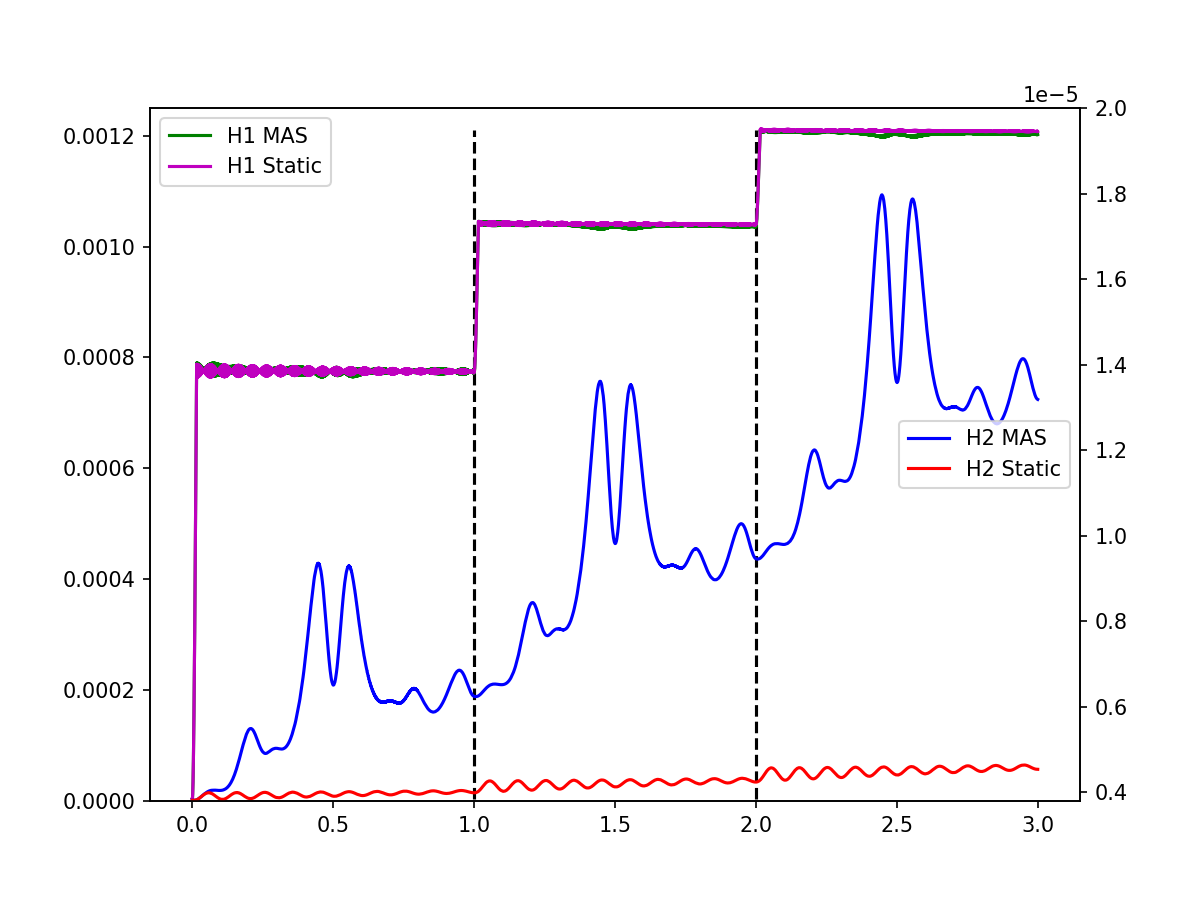

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [110]:
ub = np.max(df_50khz_h[1])
lb = np.min(df_50khz_h[1])

inc = 1e-9
rotor_period = 2e4 * inc
fig = plt.figure(figsize=(8, 6), dpi=100)
ax1 = plt.subplot2grid((1, 1), (0, 0), rowspan=1)
# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), dpi=100)

ax1.plot(df_50khz_h[0]/rotor_period, df_50khz_h[1], 'g-', label='H1 MAS')
ax1.plot(df_static_h[0]/rotor_period, df_static_h[1], 'm-', label='H1 Static')
ax1.vlines(2e4*inc/rotor_period, lb, ub, linestyle='dashed')
ax1.vlines(4e4*inc/rotor_period, lb, ub, linestyle='dashed')
ax1.set_ylim(0.0, 0.00125)
# ax1.set_xlim(0, 0.05)
ax1.legend(loc='upper left')

ax1_twin = ax1.twinx()

ax1_twin.plot(df_50khz[0]/rotor_period, df_50khz[1], 'b-', label='H2 MAS')
ax1_twin.plot(df_static[0]/rotor_period, df_static[1], 'r-', label='H2 Static')
ax1_twin.set_ylim(0.38e-5, 2e-5)

ax1_twin.legend(loc='center right')
plt.savefig('NOVEL_qband_mas50khz_buildup_3rotorperiods.ps')
plt.show()

<IPython.core.display.Javascript object>


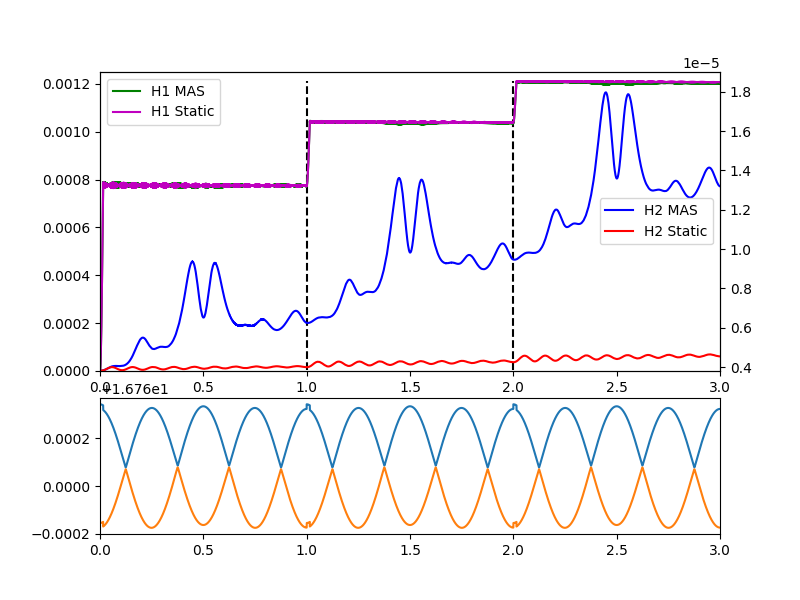

In [104]:
ub = np.max(df_50khz_h[1])
lb = np.min(df_50khz_h[1])

inc = 1e-9
rotor_period = 2e4 * inc
fig = plt.figure(figsize=(8, 6))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0), rowspan=1, sharex=ax1)
# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), dpi=100)

ax1.plot(df_50khz_h[0]/rotor_period, df_50khz_h[1], 'g-', label='H1 MAS')
ax1.plot(df_static_h[0]/rotor_period, df_static_h[1], 'm-', label='H1 Static')
ax1.vlines(2e4*inc/rotor_period, lb, ub, linestyle='dashed')
ax1.vlines(4e4*inc/rotor_period, lb, ub, linestyle='dashed')
ax1.set_ylim(0.0, 0.00125)
ax1.set_xlim(0, 3)
ax1.legend(loc='upper left')

ax1_twin = ax1.twinx()

ax1_twin.plot(df_50khz[0]/rotor_period, df_50khz[1], 'b-', label='H2 MAS')
ax1_twin.plot(df_static[0]/rotor_period, df_static[1], 'r-', label='H2 Static')
ax1_twin.set_ylim(0.38e-5, 1.9e-5)

ax1_twin.legend(loc='center right')

ax2.plot(df_eigen[0]/rotor_period, df_eigen[7]/1e9)
ax2.plot(df_eigen[0]/rotor_period, df_eigen[6]/1e9)
# ax2.plot(df_eigen[0]/rotor_period, df_eigen[8]-e_res-h_res)
# ax2.plot(df_eigen[0]/rotor_period, df_eigen[7]-e_res)
# ax2.plot(df_eigen[0]/rotor_period, df_eigen[6]-e_res)
# ax2.plot(df_eigen[0]/rotor_period, df_eigen[5]-e_res+h_res)


plt.show()

<IPython.core.display.Javascript object>


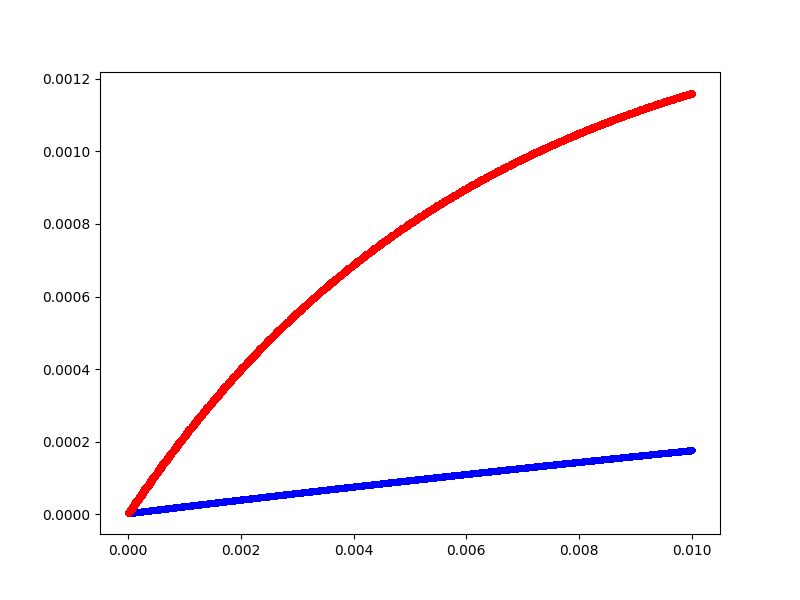

In [58]:
filename = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/outputs/NOVEL/eHH/mas/qband_buildup_raw_a0b0g0_static_param4_mix300_loop500.result'
df = pd.read_csv(filename, skiprows=2, header=None)

filename = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/outputs/NOVEL/eHH/mas/qband_buildup_raw_a0b0g0_mas50kHz_param4_mix300_loop500.result'
df_mas = pd.read_csv(filename, skiprows=2, header=None)
fig = plt.figure(figsize=(8, 6), dpi=100)
plt.plot(df[0], df[1], 'b.-')
plt.plot(df_mas[0], df_mas[1], 'r.-')
plt.show()